### Figure 2

Here we create the plots in Figure 2 in the main text.

In [2]:
import os
#print(os.getcwd())
import numpy as np
import seaborn as sns
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
import scipy.io as sio

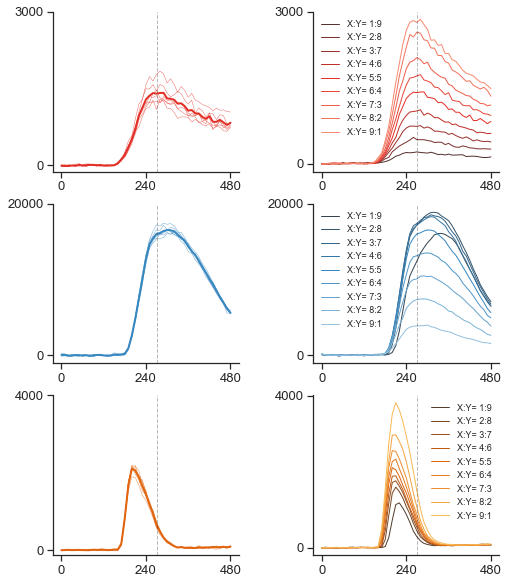

In [3]:
# Load the data from .mat file produced in Matlab
fixZData = sio.loadmat('fixZ_varyXtoY.mat')
numDataPoints=len(fixZData['all_flu'][:,0,0,0,0])
time_vec=np.array(range(0,numDataPoints*10,10))
day=0 #day 1 of the fix Z experiment
ts=270 #start of the saturation phase of cell growth 

#Store the data for the 6 replicates of condition 5
X_5_all=np.zeros([numDataPoints, 6])
Y_5_all=np.zeros([numDataPoints, 6])
Z_5_all=np.zeros([numDataPoints, 6])
whichRatio=4 #5th condition of the fixZ experiment (X:Y = 5:5)
for repl in range(6):
    X=fixZData['all_flu'][:,repl,whichRatio,0,day]
    Y=fixZData['all_flu'][:,repl,whichRatio,1,day]
    Z=fixZData['all_flu'][:,repl,whichRatio,2,day]
    X_5_all[:, repl]=X-np.mean(X[0:11]) #Exclude the mean of the fluctuations of the fluorescence before induction begins
    Y_5_all[:, repl]=Y-np.mean(Y[0:11]) # at 120 minutes
    Z_5_all[:, repl]=Z-np.mean(Z[0:11])
    
    
sns.set()
sns.set(font_scale=1.2)
sns.set_style('ticks')
red_colors = sns.color_palette("Reds_d",9)
blue_colors = sns.color_palette("Blues_d",9)
orange_colors = sns.color_palette("YlOrBr_d",9)
Fig2 = plt.figure(figsize=(8,10))

#Plot 6 replicates of strain X (condition 5)
plt.subplot(3,2,1)
plt.plot(time_vec,X_5_all, color=red_colors[4], lw=0.5, alpha=0.7)   
plt.plot(time_vec, np.mean(X_5_all, axis=1), color=red_colors[4], lw=2)
plt.axvline(ts, linestyle='--', color='k', lw=1, alpha=0.3)
plt.xticks((0,240,480),(0,240,480))
plt.yticks((0,3000),(0,3000))
sns.despine()


#Plot 6 replicates of strain Y 
plt.subplot(3,2,3)
plt.plot(time_vec,Y_5_all, color=blue_colors[4], lw=0.5, alpha=0.7)   
plt.plot(time_vec, np.mean(Y_5_all, axis=1), color=blue_colors[4], lw=2)
plt.axvline(ts, linestyle='--', color='k', lw=1, alpha=0.3)
plt.xticks((0,240,480),(0,240,480))
plt.yticks((0,20000),(0,20000))
sns.despine()

#Plot 6 replicates of strain Z 
plt.subplot(3,2,5)
plt.plot(time_vec,Z_5_all, color=orange_colors[4], lw=0.5, alpha=0.7)   
plt.plot(time_vec, np.mean(Z_5_all, axis=1), color=orange_colors[4], lw=2)
plt.axvline(ts, linestyle='--', color='k', lw=1, alpha=0.3)
plt.xticks((0,240,480),(0,240,480))
plt.yticks((0,4000),(0,4000))
sns.despine()

#Store the data for all 9 conditions of day 1 of fixZ (for each condition, the mean of 6 replicates is stored and plotted)
X_9cond=np.zeros([numDataPoints, 9])
Y_9cond=np.zeros([numDataPoints, 9])
Z_9cond=np.zeros([numDataPoints, 9])
for c in range(9):
    X_reps=np.zeros([numDataPoints, 6])
    Y_reps=np.zeros([numDataPoints, 6])
    Z_reps=np.zeros([numDataPoints, 6])
    for repl in range(6):
        X=fixZData['all_flu'][:,repl,c,0,day]
        Y=fixZData['all_flu'][:,repl,c,1,day]
        Z=fixZData['all_flu'][:,repl,c,2,day]
        X=X-np.mean(X[0:11])
        Y=Y-np.mean(Y[0:11])
        Z=Z-np.mean(Z[0:11])
        X_reps[:, repl]=X
        Y_reps[:, repl]=Y
        Z_reps[:, repl]=Z
    X_9cond[:,c] = np.mean(X_reps, axis=1)
    Y_9cond[:,c] = np.mean(Y_reps, axis=1)
    Z_9cond[:,c] = np.mean(Z_reps, axis=1)


#Plot 9 conditions of fixZ experiment for strain X 
plt.subplot(3,2,2)
for c in range(9):
    plt.plot(time_vec,X_9cond[:,8-c], color=red_colors[c], lw=1, label='X:Y= {}:{}'.format(c+1,9-c))   
plt.axvline(ts, linestyle='--', color='k', lw=1, alpha=0.3)
plt.legend(fontsize=9, frameon=False)
plt.xticks((0,240,480),(0,240,480))
plt.yticks((0,3000),(0,3000))
sns.despine()

#Plot 9 conditions of fixZ experiment for strain Y 
plt.subplot(3,2,4)
for c in range(9):
    plt.plot(time_vec,Y_9cond[:,8-c], color=blue_colors[c], lw=1, label='X:Y= {}:{}'.format(c+1,9-c))    
plt.axvline(ts, linestyle='--', color='k', lw=1, alpha=0.3)
plt.legend(fontsize=9, frameon=False)
plt.xticks((0,240,480),(0,240,480))
plt.yticks((0,20000),(0,20000))
sns.despine()

#Plot 9 conditions of fixZ experiment for strain Z 
plt.subplot(3,2,6)
for c in range(9):
    plt.plot(time_vec,Z_9cond[:,8-c], color=orange_colors[c], lw=1, label='X:Y= {}:{}'.format(c+1,9-c))  
plt.axvline(ts, linestyle='--', color='k', lw=1, alpha=0.3)
plt.legend(fontsize=9, frameon=False)
plt.xticks((0,240,480),(0,240,480))
plt.yticks((0,4000),(0,4000))
sns.despine()

Fig2.subplots_adjust(wspace=0.4)


Fig2.savefig("Fig2_temp.pdf", bbox_inches='tight', transparent=True)